## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [5]:
X = np.linspace(0,20).reshape(50,1)
ones = [1] * 50
X = np.insert(X, 0, ones, axis=1)
print(X)


[[ 1.          0.        ]
 [ 1.          0.40816327]
 [ 1.          0.81632653]
 [ 1.          1.2244898 ]
 [ 1.          1.63265306]
 [ 1.          2.04081633]
 [ 1.          2.44897959]
 [ 1.          2.85714286]
 [ 1.          3.26530612]
 [ 1.          3.67346939]
 [ 1.          4.08163265]
 [ 1.          4.48979592]
 [ 1.          4.89795918]
 [ 1.          5.30612245]
 [ 1.          5.71428571]
 [ 1.          6.12244898]
 [ 1.          6.53061224]
 [ 1.          6.93877551]
 [ 1.          7.34693878]
 [ 1.          7.75510204]
 [ 1.          8.16326531]
 [ 1.          8.57142857]
 [ 1.          8.97959184]
 [ 1.          9.3877551 ]
 [ 1.          9.79591837]
 [ 1.         10.20408163]
 [ 1.         10.6122449 ]
 [ 1.         11.02040816]
 [ 1.         11.42857143]
 [ 1.         11.83673469]
 [ 1.         12.24489796]
 [ 1.         12.65306122]
 [ 1.         13.06122449]
 [ 1.         13.46938776]
 [ 1.         13.87755102]
 [ 1.         14.28571429]
 [ 1.         14.69387755]
 

In [11]:
a = -2
b = 1
y = np.array(a * X[:,1] + b).reshape(X.shape[0],1)
print(y)

[[  1.        ]
 [  0.18367347]
 [ -0.63265306]
 [ -1.44897959]
 [ -2.26530612]
 [ -3.08163265]
 [ -3.89795918]
 [ -4.71428571]
 [ -5.53061224]
 [ -6.34693878]
 [ -7.16326531]
 [ -7.97959184]
 [ -8.79591837]
 [ -9.6122449 ]
 [-10.42857143]
 [-11.24489796]
 [-12.06122449]
 [-12.87755102]
 [-13.69387755]
 [-14.51020408]
 [-15.32653061]
 [-16.14285714]
 [-16.95918367]
 [-17.7755102 ]
 [-18.59183673]
 [-19.40816327]
 [-20.2244898 ]
 [-21.04081633]
 [-21.85714286]
 [-22.67346939]
 [-23.48979592]
 [-24.30612245]
 [-25.12244898]
 [-25.93877551]
 [-26.75510204]
 [-27.57142857]
 [-28.3877551 ]
 [-29.20408163]
 [-30.02040816]
 [-30.83673469]
 [-31.65306122]
 [-32.46938776]
 [-33.28571429]
 [-34.10204082]
 [-34.91836735]
 [-35.73469388]
 [-36.55102041]
 [-37.36734694]
 [-38.18367347]
 [-39.        ]]


#### Plot your data points. 

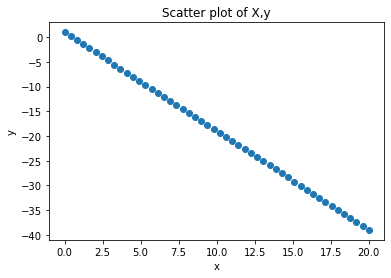

In [40]:
plt.scatter(X[:,1], y)
plt.title('Scatter plot of X,y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [97]:
theta=np.zeros([X.shape[1],1])
learning_rate = 0.0001

In [98]:
def hypothesis(theta,X):
    return X@theta
hypothesis(theta,X)


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [99]:
def cost_function(predictions,y):
    m = len(predictions)
    norm = (np.linalg.norm(predictions-y))**2    
    return norm /(2*m)

cost_output = cost_function(hypothesis(theta,X),y)
print(cost_output)

249.88775510204087


In [100]:
def gradient(X,y,predictions):
    m = len(X)
    return (X.T@(predictions-y))/m 

In [123]:
def batch_training(X, y, theta, learning_rate, iters):
    cost_history = []
    theta_history = []
    y_predicted_history = []
    
    predictions = hypothesis(theta,X)

    cost_history.append(cost_function(predictions,y))
    theta_history.append(theta)
    for i in range(iters):
        theta = theta - learning_rate * gradient(X,y,predictions)
        theta_history.append(theta)
        predictions = hypothesis(theta,X)
        y_predicted_history.append(predictions)
        cost = cost_function(predictions,y)
        cost_history.append(cost)
        
        if(cost < 0.01):
            break;
        print("iter={}, theta={},  cost= {}".format(i, theta_history[i], cost))
    return np.array(theta_history).reshape(len(theta_history),2), np.array(cost_history), y_predicted_history

theta_output, cost_output, predictions_output = batch_training(X, y, theta, learning_rate, 1000)

iter=0, theta=[[0.]
 [0.]],  cost= 243.16926136648374
iter=1, theta=[[-0.0019    ]
 [-0.02593878]],  cost= 236.63152249105116
iter=2, theta=[[-0.00377387]
 [-0.05152627]],  cost= 230.269675427199
iter=3, theta=[[-0.00562197]
 [-0.07676725]],  cost= 224.07898796237393
iter=4, theta=[[-0.00744464]
 [-0.10166639]],  cost= 218.05485519998783
iter=5, theta=[[-0.00924223]
 [-0.12622834]],  cost= 212.19279613409427
iter=6, theta=[[-0.01101507]
 [-0.15045765]],  cost= 206.48845031622204
iter=7, theta=[[-0.01276352]
 [-0.17435884]],  cost= 200.9375746118829
iter=8, theta=[[-0.01448788]
 [-0.19793635]],  cost= 195.53604004434382
iter=9, theta=[[-0.0161885 ]
 [-0.22119455]],  cost= 190.2798287233142
iter=10, theta=[[-0.01786568]
 [-0.24413778]],  cost= 185.16503085626366
iter=11, theta=[[-0.01951976]
 [-0.26677031]],  cost= 180.1878418401484
iter=12, theta=[[-0.02115104]
 [-0.28909633]],  cost= 175.34455943138175
iter=13, theta=[[-0.02275982]
 [-0.31112   ]],  cost= 170.63158099194396
iter=14, th

In [124]:
for i in range(len(predictions_output)):
    print("iter={}, hypothesis_output = {}".format(i, predictions_output[i]))


iter=0, hypothesis_output = [[-0.0019    ]
 [-0.01248726]
 [-0.02307451]
 [-0.03366177]
 [-0.04424902]
 [-0.05483628]
 [-0.06542353]
 [-0.07601079]
 [-0.08659804]
 [-0.0971853 ]
 [-0.10777255]
 [-0.11835981]
 [-0.12894706]
 [-0.13953432]
 [-0.15012157]
 [-0.16070883]
 [-0.17129608]
 [-0.18188334]
 [-0.1924706 ]
 [-0.20305785]
 [-0.21364511]
 [-0.22423236]
 [-0.23481962]
 [-0.24540687]
 [-0.25599413]
 [-0.26658138]
 [-0.27716864]
 [-0.28775589]
 [-0.29834315]
 [-0.3089304 ]
 [-0.31951766]
 [-0.33010491]
 [-0.34069217]
 [-0.35127943]
 [-0.36186668]
 [-0.37245394]
 [-0.38304119]
 [-0.39362845]
 [-0.4042157 ]
 [-0.41480296]
 [-0.42539021]
 [-0.43597747]
 [-0.44656472]
 [-0.45715198]
 [-0.46773923]
 [-0.47832649]
 [-0.48891374]
 [-0.499501  ]
 [-0.51008825]
 [-0.52067551]]
iter=1, hypothesis_output = [[-0.00377387]
 [-0.024805  ]
 [-0.04583613]
 [-0.06686727]
 [-0.0878984 ]
 [-0.10892953]
 [-0.12996066]
 [-0.15099179]
 [-0.17202292]
 [-0.19305405]
 [-0.21408518]
 [-0.23511632]
 [-0.25614745

In [125]:
last_theta_0 = theta_output[-1][0]
last_theta_1 = theta_output[-1][1]
print('optimum value of Theta_0: ',last_theta_0)
print('optimum value of Theta_1: ',last_theta_1)

y_predicted = hypothesis(theta_output[-1].reshape(2,1),X)
print('Best regression line: ',y_predicted)

optimum value of Theta_0:  -0.11355273098806004
optimum value of Theta_1:  -1.917167315218042
Best regression line:  [[ -0.11355273]
 [ -0.89607   ]
 [ -1.67858727]
 [ -2.46110455]
 [ -3.24362182]
 [ -4.02613909]
 [ -4.80865636]
 [ -5.59117363]
 [ -6.3736909 ]
 [ -7.15620817]
 [ -7.93872545]
 [ -8.72124272]
 [ -9.50375999]
 [-10.28627726]
 [-11.06879453]
 [-11.8513118 ]
 [-12.63382908]
 [-13.41634635]
 [-14.19886362]
 [-14.98138089]
 [-15.76389816]
 [-16.54641543]
 [-17.3289327 ]
 [-18.11144998]
 [-18.89396725]
 [-19.67648452]
 [-20.45900179]
 [-21.24151906]
 [-22.02403633]
 [-22.8065536 ]
 [-23.58907088]
 [-24.37158815]
 [-25.15410542]
 [-25.93662269]
 [-26.71913996]
 [-27.50165723]
 [-28.28417451]
 [-29.06669178]
 [-29.84920905]
 [-30.63172632]
 [-31.41424359]
 [-32.19676086]
 [-32.97927813]
 [-33.76179541]
 [-34.54431268]
 [-35.32682995]
 [-36.10934722]
 [-36.89186449]
 [-37.67438176]
 [-38.45689904]]


In [126]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square)



Coefficient of Determination 0.9976984606392719


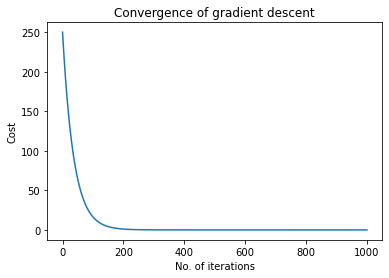

In [127]:
#Plot the cost function
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_output)

plt.show()

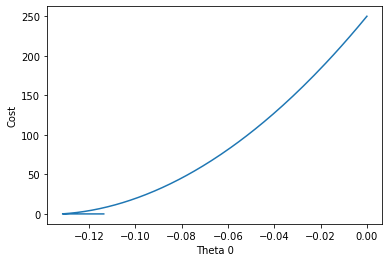

In [128]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 0')
plt.ylabel('Cost')
plt.plot(theta_output[:,0],cost_output)

plt.show()

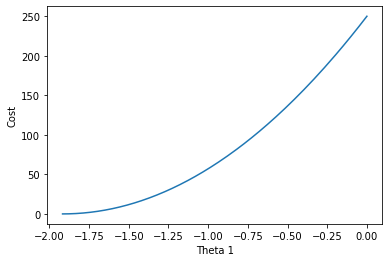

In [129]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 1')
plt.ylabel('Cost')
plt.plot(theta_output[:,1],cost_output)

plt.show()

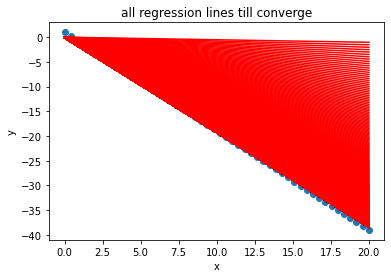

In [130]:
plt.scatter(X[:,1], y)
for i in range(1,len(predictions_output)):
    plt.plot(X[:,1], predictions_output[i], c='red')
plt.title('all regression lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

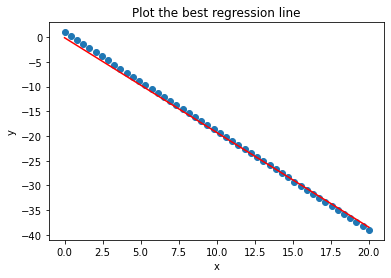

In [131]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_predicted, c='red')
plt.title('Plot the best regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

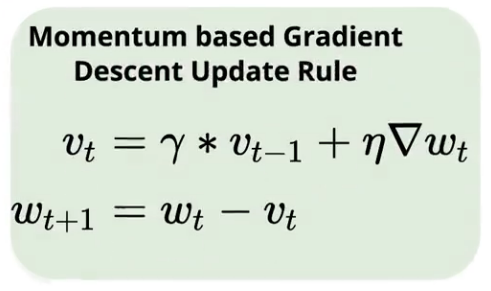

#### γ takes values between 0 and 1.
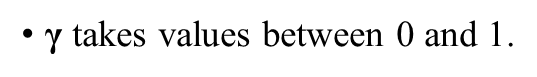

## Gamma = 0.9

In [152]:
theta=np.zeros([X.shape[1],1])
learning_rate = 0.001
gamma = 0.9

In [153]:
def momentum_training(X, y, theta, learning_rate, iters,gamma):
    cost_history = []
    theta_history = []
    y_predicted_history = []
    v = 0
    predictions = hypothesis(theta,X)

    cost_history.append(cost_function(predictions,y))
    theta_history.append(theta)
    for i in range(iters):
        v = gamma * v + learning_rate * gradient(X,y,predictions)
        theta = theta - v
        theta_history.append(theta)
        predictions = hypothesis(theta,X)
        y_predicted_history.append(predictions)
        cost = cost_function(predictions,y)
        cost_history.append(cost)
        
        if(cost < 0.01):
            break;
        print("iter={}, theta={},  cost= {}".format(i, theta_history[i], cost))
    return np.array(theta_history).reshape(len(theta_history),2), np.array(cost_history), y_predicted_history

theta_output, cost_output, predictions_output = momentum_training(X, y, theta, learning_rate, 1000,gamma)

iter=0, theta=[[0.]
 [0.]],  cost= 186.82544901821944
iter=1, theta=[[-0.019     ]
 [-0.25938776]],  cost= 97.89384211704368
iter=2, theta=[[-0.05248712]
 [-0.71709655]],  cost= 26.66746740608377
iter=3, theta=[[-0.09440208]
 [-1.29130883]],  cost= 0.2021106357443108
iter=4, theta=[[-0.13811805]
 [-1.89261222]],  cost= 18.690258827319543
iter=5, theta=[[-0.17739819]
 [-2.43686858]],  cost= 60.42028334378711
iter=6, theta=[[-0.20720422]
 [-2.85608179]],  cost= 96.66975858001445
iter=7, theta=[[-0.22426163]
 [-3.10599266]],  cost= 107.25308626517973
iter=8, theta=[[-0.22732911]
 [-3.16969939]],  cost= 88.88206745425788
iter=9, theta=[[-0.21716553]
 [-3.05721081]],  cost= 53.55504409432992
iter=10, theta=[[-0.19622902]
 [-2.80139961]],  cost= 19.66832365791707
iter=11, theta=[[-0.16817594]
 [-2.45126361]],  cost= 1.6439068038690028
iter=12, theta=[[-0.13724736]
 [-2.06367702]],  cost= 3.503094988945922
iter=13, theta=[[-0.10763762]
 [-1.6948997 ]],  cost= 18.825545524851666
iter=14, theta

In [154]:
for i in range(len(predictions_output)):
    print("iter={}, hypothesis_output = {}".format(i, predictions_output[i]))

iter=0, hypothesis_output = [[-0.019     ]
 [-0.12487255]
 [-0.23074511]
 [-0.33661766]
 [-0.44249021]
 [-0.54836277]
 [-0.65423532]
 [-0.76010787]
 [-0.86598042]
 [-0.97185298]
 [-1.07772553]
 [-1.18359808]
 [-1.28947064]
 [-1.39534319]
 [-1.50121574]
 [-1.6070883 ]
 [-1.71296085]
 [-1.8188334 ]
 [-1.92470596]
 [-2.03057851]
 [-2.13645106]
 [-2.24232362]
 [-2.34819617]
 [-2.45406872]
 [-2.55994127]
 [-2.66581383]
 [-2.77168638]
 [-2.87755893]
 [-2.98343149]
 [-3.08930404]
 [-3.19517659]
 [-3.30104915]
 [-3.4069217 ]
 [-3.51279425]
 [-3.61866681]
 [-3.72453936]
 [-3.83041191]
 [-3.93628446]
 [-4.04215702]
 [-4.14802957]
 [-4.25390212]
 [-4.35977468]
 [-4.46564723]
 [-4.57151978]
 [-4.67739234]
 [-4.78326489]
 [-4.88913744]
 [-4.99501   ]
 [-5.10088255]
 [-5.2067551 ]]
iter=1, hypothesis_output = [[ -0.05248712]
 [ -0.34517959]
 [ -0.63787206]
 [ -0.93056453]
 [ -1.223257  ]
 [ -1.51594946]
 [ -1.80864193]
 [ -2.1013344 ]
 [ -2.39402687]
 [ -2.68671934]
 [ -2.97941181]
 [ -3.27210427]
 

In [155]:
last_theta_0 = theta_output[-1][0]
last_theta_1 = theta_output[-1][1]
print('optimum value of Theta_0: ',last_theta_0)
print('optimum value of Theta_1: ',last_theta_1)

y_predicted = hypothesis(theta_output[-1].reshape(2,1),X)
print('Best regression line: ',y_predicted)

optimum value of Theta_0:  0.7217624575732194
optimum value of Theta_1:  -1.97930360989305
Best regression line:  [[  0.72176246]
 [ -0.08611657]
 [ -0.89399559]
 [ -1.70187462]
 [ -2.50975364]
 [ -3.31763266]
 [ -4.12551169]
 [ -4.93339071]
 [ -5.74126974]
 [ -6.54914876]
 [ -7.35702779]
 [ -8.16490681]
 [ -8.97278584]
 [ -9.78066486]
 [-10.58854388]
 [-11.39642291]
 [-12.20430193]
 [-13.01218096]
 [-13.82005998]
 [-14.62793901]
 [-15.43581803]
 [-16.24369706]
 [-17.05157608]
 [-17.8594551 ]
 [-18.66733413]
 [-19.47521315]
 [-20.28309218]
 [-21.0909712 ]
 [-21.89885023]
 [-22.70672925]
 [-23.51460828]
 [-24.3224873 ]
 [-25.13036632]
 [-25.93824535]
 [-26.74612437]
 [-27.5540034 ]
 [-28.36188242]
 [-29.16976145]
 [-29.97764047]
 [-30.7855195 ]
 [-31.59339852]
 [-32.40127754]
 [-33.20915657]
 [-34.01703559]
 [-34.82491462]
 [-35.63279364]
 [-36.44067267]
 [-37.24855169]
 [-38.05643072]
 [-38.86430974]]


In [156]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.9998563094671258


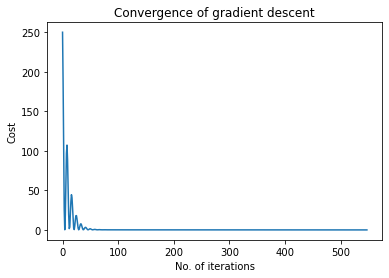

In [158]:
#Plot the cost function
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_output)

plt.show()

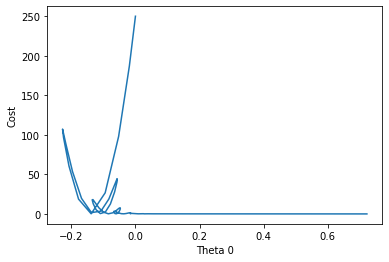

In [159]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 0')
plt.ylabel('Cost')
plt.plot(theta_output[:,0],cost_output)

plt.show()

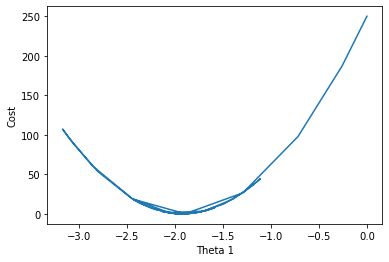

In [160]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 1')
plt.ylabel('Cost')
plt.plot(theta_output[:,1],cost_output)

plt.show()

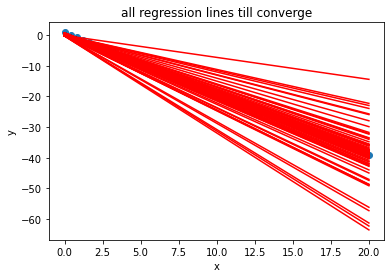

In [161]:
plt.scatter(X[:,1], y)
for i in range(1,len(predictions_output)):
    plt.plot(X[:,1], predictions_output[i], c='red')
plt.title('all regression lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

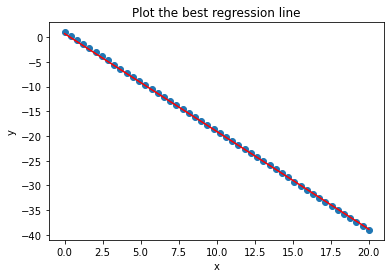

In [162]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_predicted, c='red')
plt.title('Plot the best regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

## Gamma = 0.1

In [163]:
theta=np.zeros([X.shape[1],1])
learning_rate = 0.001
gamma = 0.1

theta_output, cost_output, predictions_output = momentum_training(X, y, theta, learning_rate, 1000,gamma)

iter=0, theta=[[0.]
 [0.]],  cost= 186.82544901821944
iter=1, theta=[[-0.019     ]
 [-0.25938776]],  cost= 134.67808204237497
iter=2, theta=[[-0.03728712]
 [-0.50958634]],  cost= 96.61247692454903
iter=3, theta=[[-0.05298268]
 [-0.72498293]],  cost= 69.27067339400301
iter=4, theta=[[-0.06624943]
 [-0.90772975]],  cost= 49.67529755301362
iter=5, theta=[[-0.07743256]
 [-1.06246405]],  cost= 35.63600173839486
iter=6, theta=[[-0.0868488 ]
 [-1.19344351]],  cost= 25.577841516087982
iter=7, theta=[[-0.09476914]
 [-1.30431119]],  cost= 18.371918701431
iter=8, theta=[[-0.10142329]
 [-1.39815529]],  cost= 13.209408320605615
iter=9, theta=[[-0.10700573]
 [-1.47759026]],  cost= 9.510844517267293
iter=10, theta=[[-0.11168106]
 [-1.5448291 ]],  cost= 6.861084544728419
iter=11, theta=[[-0.11558862]
 [-1.6017449 ]],  cost= 4.962710887310119
iter=12, theta=[[-0.11884634]
 [-1.64992312]],  cost= 3.602647043801183
iter=13, theta=[[-0.12155404]
 [-1.69070569]],  cost= 2.6282402889079917
iter=14, theta=[[

In [164]:
for i in range(len(predictions_output)):
    print("iter={}, hypothesis_output = {}".format(i, predictions_output[i]))

iter=0, hypothesis_output = [[-0.019     ]
 [-0.12487255]
 [-0.23074511]
 [-0.33661766]
 [-0.44249021]
 [-0.54836277]
 [-0.65423532]
 [-0.76010787]
 [-0.86598042]
 [-0.97185298]
 [-1.07772553]
 [-1.18359808]
 [-1.28947064]
 [-1.39534319]
 [-1.50121574]
 [-1.6070883 ]
 [-1.71296085]
 [-1.8188334 ]
 [-1.92470596]
 [-2.03057851]
 [-2.13645106]
 [-2.24232362]
 [-2.34819617]
 [-2.45406872]
 [-2.55994127]
 [-2.66581383]
 [-2.77168638]
 [-2.87755893]
 [-2.98343149]
 [-3.08930404]
 [-3.19517659]
 [-3.30104915]
 [-3.4069217 ]
 [-3.51279425]
 [-3.61866681]
 [-3.72453936]
 [-3.83041191]
 [-3.93628446]
 [-4.04215702]
 [-4.14802957]
 [-4.25390212]
 [-4.35977468]
 [-4.46564723]
 [-4.57151978]
 [-4.67739234]
 [-4.78326489]
 [-4.88913744]
 [-4.99501   ]
 [-5.10088255]
 [-5.2067551 ]]
iter=1, hypothesis_output = [[ -0.03728712]
 [ -0.24528155]
 [ -0.45327597]
 [ -0.6612704 ]
 [ -0.86926483]
 [ -1.07725925]
 [ -1.28525368]
 [ -1.4932481 ]
 [ -1.70124253]
 [ -1.90923695]
 [ -2.11723138]
 [ -2.32522581]
 

In [165]:
last_theta_0 = theta_output[-1][0]
last_theta_1 = theta_output[-1][1]
print('optimum value of Theta_0: ',last_theta_0)
print('optimum value of Theta_1: ',last_theta_1)

y_predicted = hypothesis(theta_output[-1].reshape(2,1),X)
print('Best regression line: ',y_predicted)

optimum value of Theta_0:  0.14055563735229729
optimum value of Theta_1:  -1.9360711870534832
Best regression line:  [[  0.14055564]
 [ -0.6496775 ]
 [ -1.43991064]
 [ -2.23014378]
 [ -3.02037691]
 [ -3.81061005]
 [ -4.60084319]
 [ -5.39107633]
 [ -6.18130946]
 [ -6.9715426 ]
 [ -7.76177574]
 [ -8.55200888]
 [ -9.34224201]
 [-10.13247515]
 [-10.92270829]
 [-11.71294143]
 [-12.50317456]
 [-13.2934077 ]
 [-14.08364084]
 [-14.87387398]
 [-15.66410711]
 [-16.45434025]
 [-17.24457339]
 [-18.03480653]
 [-18.82503966]
 [-19.6152728 ]
 [-20.40550594]
 [-21.19573908]
 [-21.98597221]
 [-22.77620535]
 [-23.56643849]
 [-24.35667163]
 [-25.14690476]
 [-25.9371379 ]
 [-26.72737104]
 [-27.51760418]
 [-28.30783732]
 [-29.09807045]
 [-29.88830359]
 [-30.67853673]
 [-31.46876987]
 [-32.259003  ]
 [-33.04923614]
 [-33.83946928]
 [-34.62970242]
 [-35.41993555]
 [-36.21016869]
 [-37.00040183]
 [-37.79063497]
 [-38.5808681 ]]


In [166]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.9986290164859525


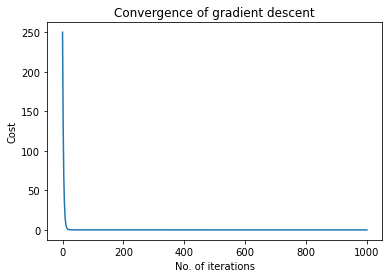

In [167]:
#Plot the cost function
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_output)

plt.show()

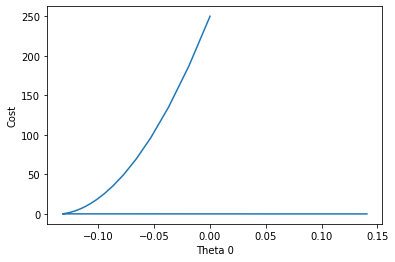

In [168]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 0')
plt.ylabel('Cost')
plt.plot(theta_output[:,0],cost_output)

plt.show()

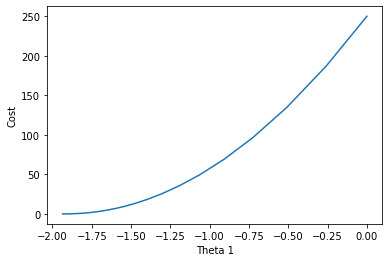

In [169]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 1')
plt.ylabel('Cost')
plt.plot(theta_output[:,1],cost_output)

plt.show()

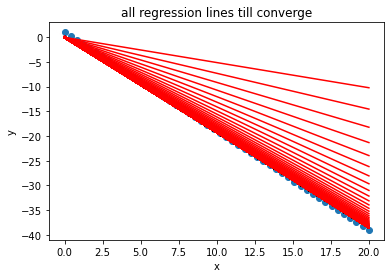

In [170]:
plt.scatter(X[:,1], y)
for i in range(1,len(predictions_output)):
    plt.plot(X[:,1], predictions_output[i], c='red')
plt.title('all regression lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

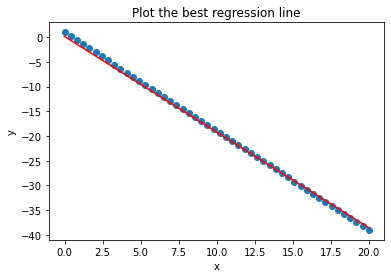

In [171]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_predicted, c='red')
plt.title('Plot the best regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Gamma = 0

In [172]:
theta=np.zeros([X.shape[1],1])
learning_rate = 0.001
gamma = 0

theta_output, cost_output, predictions_output = momentum_training(X, y, theta, learning_rate, 1000,gamma)

iter=0, theta=[[0.]
 [0.]],  cost= 186.82544901821944
iter=1, theta=[[-0.019     ]
 [-0.25938776]],  cost= 139.68837516021628
iter=2, theta=[[-0.03538712]
 [-0.48364757]],  cost= 104.45490187382674
iter=3, theta=[[-0.04951526]
 [-0.67753709]],  cost= 78.11898842228953
iter=4, theta=[[-0.06169037]
 [-0.84516959]],  cost= 58.43371572199668
iter=5, theta=[[-0.07217699]
 [-0.99010127]],  cost= 43.71958378928335
iter=6, theta=[[-0.0812038 ]
 [-1.11540668]],  cost= 32.72122022747043
iter=7, theta=[[-0.08896853]
 [-1.22374394]],  cost= 24.50027441454269
iter=8, theta=[[-0.09564212]
 [-1.3174112 ]],  cost= 18.355359342017692
iter=9, theta=[[-0.10137236]
 [-1.39839531]],  cost= 13.762210705990901
iter=10, theta=[[-0.10628704]
 [-1.46841405]],  cost= 10.328957746061088
iter=11, theta=[[-0.11049661]
 [-1.52895256]],  cost= 7.762689631346794
iter=12, theta=[[-0.11409659]
 [-1.5812948 ]],  cost= 5.844464905842495
iter=13, theta=[[-0.11716955]
 [-1.62655086]],  cost= 4.410631849965184
iter=14, theta

In [173]:
for i in range(len(predictions_output)):
    print("iter={}, hypothesis_output = {}".format(i, predictions_output[i]))

iter=0, hypothesis_output = [[-0.019     ]
 [-0.12487255]
 [-0.23074511]
 [-0.33661766]
 [-0.44249021]
 [-0.54836277]
 [-0.65423532]
 [-0.76010787]
 [-0.86598042]
 [-0.97185298]
 [-1.07772553]
 [-1.18359808]
 [-1.28947064]
 [-1.39534319]
 [-1.50121574]
 [-1.6070883 ]
 [-1.71296085]
 [-1.8188334 ]
 [-1.92470596]
 [-2.03057851]
 [-2.13645106]
 [-2.24232362]
 [-2.34819617]
 [-2.45406872]
 [-2.55994127]
 [-2.66581383]
 [-2.77168638]
 [-2.87755893]
 [-2.98343149]
 [-3.08930404]
 [-3.19517659]
 [-3.30104915]
 [-3.4069217 ]
 [-3.51279425]
 [-3.61866681]
 [-3.72453936]
 [-3.83041191]
 [-3.93628446]
 [-4.04215702]
 [-4.14802957]
 [-4.25390212]
 [-4.35977468]
 [-4.46564723]
 [-4.57151978]
 [-4.67739234]
 [-4.78326489]
 [-4.88913744]
 [-4.99501   ]
 [-5.10088255]
 [-5.2067551 ]]
iter=1, hypothesis_output = [[-0.03538712]
 [-0.23279429]
 [-0.43020146]
 [-0.62760863]
 [-0.8250158 ]
 [-1.02242297]
 [-1.21983015]
 [-1.41723732]
 [-1.61464449]
 [-1.81205166]
 [-2.00945883]
 [-2.206866  ]
 [-2.40427317

In [174]:
last_theta_0 = theta_output[-1][0]
last_theta_1 = theta_output[-1][1]
print('optimum value of Theta_0: ',last_theta_0)
print('optimum value of Theta_1: ',last_theta_1)

y_predicted = hypothesis(theta_output[-1].reshape(2,1),X)
print('Best regression line: ',y_predicted)

optimum value of Theta_0:  0.11575559814482803
optimum value of Theta_1:  -1.934226463722381
Best regression line:  [[  0.1157556 ]
 [ -0.67372459]
 [ -1.46320478]
 [ -2.25268497]
 [ -3.04216516]
 [ -3.83164535]
 [ -4.62112554]
 [ -5.41060573]
 [ -6.20008592]
 [ -6.98956611]
 [ -7.77904629]
 [ -8.56852648]
 [ -9.35800667]
 [-10.14748686]
 [-10.93696705]
 [-11.72644724]
 [-12.51592743]
 [-13.30540762]
 [-14.09488781]
 [-14.884368  ]
 [-15.67384819]
 [-16.46332838]
 [-17.25280857]
 [-18.04228876]
 [-18.83176894]
 [-19.62124913]
 [-20.41072932]
 [-21.20020951]
 [-21.9896897 ]
 [-22.77916989]
 [-23.56865008]
 [-24.35813027]
 [-25.14761046]
 [-25.93709065]
 [-26.72657084]
 [-27.51605103]
 [-28.30553122]
 [-29.09501141]
 [-29.88449159]
 [-30.67397178]
 [-31.46345197]
 [-32.25293216]
 [-33.04241235]
 [-33.83189254]
 [-34.62137273]
 [-35.41085292]
 [-36.20033311]
 [-36.9898133 ]
 [-37.77929349]
 [-38.56877368]]


In [175]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.9985487529969077


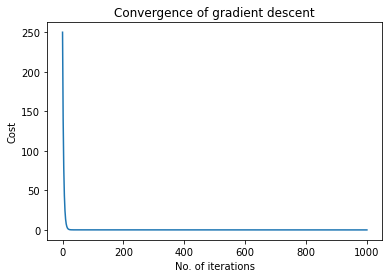

In [176]:
#Plot the cost function
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_output)

plt.show()

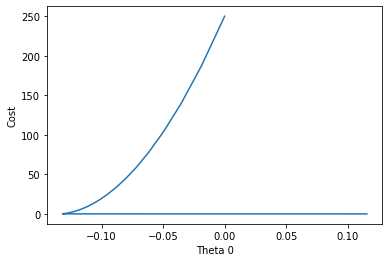

In [177]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 0')
plt.ylabel('Cost')
plt.plot(theta_output[:,0],cost_output)

plt.show()

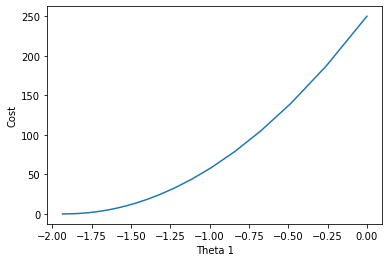

In [178]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 1')
plt.ylabel('Cost')
plt.plot(theta_output[:,1],cost_output)

plt.show()

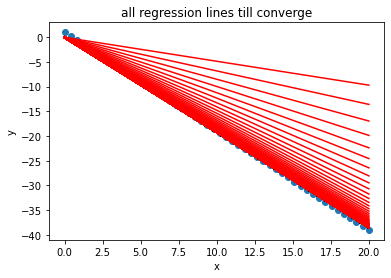

In [179]:
plt.scatter(X[:,1], y)
for i in range(1,len(predictions_output)):
    plt.plot(X[:,1], predictions_output[i], c='red')
plt.title('all regression lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

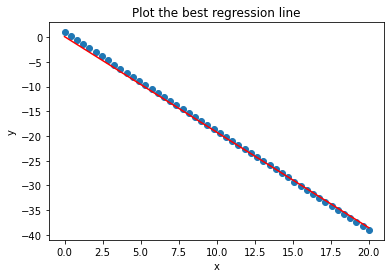

In [180]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_predicted, c='red')
plt.title('Plot the best regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Update your Batch GD for one variable  implementation to be NAG and check your results

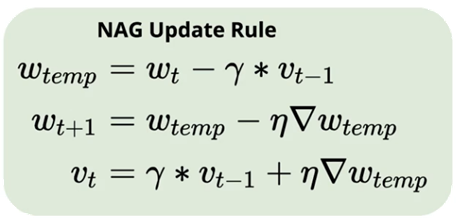

In [181]:
theta=np.zeros([X.shape[1],1])
learning_rate = 0.001
gamma = 0.9



In [182]:
def nag_training(X, y, theta, learning_rate, iters,gamma):
    cost_history = []
    theta_history = []
    y_predicted_history = []
    v = 0
    
    theta_tmp = theta - gamma * v
    predictions_tmp = hypothesis(theta_tmp,X)
    
    predictions = hypothesis(theta,X)

    cost_history.append(cost_function(predictions,y))
    theta_history.append(theta)
    for i in range(iters):
        v = gamma * v + learning_rate * gradient(X,y,predictions_tmp)
        theta = theta - v
        
        theta_tmp = theta - gamma * v
        predictions_tmp = hypothesis(theta_tmp,X)

        
        theta_history.append(theta)
        predictions = hypothesis(theta,X)
        y_predicted_history.append(predictions)
        cost = cost_function(predictions,y)
        cost_history.append(cost)
        
        if(cost < 0.01):
            break;
        print("iter={}, theta={},  cost= {}".format(i, theta_history[i], cost))
    return np.array(theta_history).reshape(len(theta_history),2), np.array(cost_history), y_predicted_history

theta_output, cost_output, predictions_output = nag_training(X, y, theta, learning_rate, 1000,gamma)

iter=0, theta=[[0.]
 [0.]],  cost= 186.82544901821944
iter=1, theta=[[-0.019     ]
 [-0.25938776]],  cost= 103.11992464754746
iter=2, theta=[[-0.05013553]
 [-0.6854814 ]],  cost= 36.60929115372174
iter=3, theta=[[-0.0863897 ]
 [-1.18358873]],  cost= 4.252605938699162
iter=4, theta=[[-0.12158057]
 [-1.67027793]],  cost= 2.063123211023327
iter=5, theta=[[-0.15101613]
 [-2.08217858]],  cost= 14.871393509199812
iter=6, theta=[[-0.17180173]
 [-2.38011269]],  cost= 27.494544074158284
iter=7, theta=[[-0.18283573]
 [-2.54903254]],  cost= 31.565039393938676
iter=8, theta=[[-0.18456295]
 [-2.59470419]],  cost= 26.55436225867933
iter=9, theta=[[-0.17857325]
 [-2.53830797]],  cost= 16.797363006862803
iter=10, theta=[[-0.16713383]
 [-2.41014936]],  cost= 7.465766037833133
iter=11, theta=[[-0.15273344]
 [-2.24352958]],  cost= 1.7646428128732417
iter=12, theta=[[-0.1376976 ]
 [-2.06957051]],  cost= 0.16331860804378553
iter=13, theta=[[-0.1239111 ]
 [-1.91348306]],  cost= 1.2105430602861822
iter=14, t

In [183]:
for i in range(len(predictions_output)):
    print("iter={}, hypothesis_output = {}".format(i, predictions_output[i]))

iter=0, hypothesis_output = [[-0.019     ]
 [-0.12487255]
 [-0.23074511]
 [-0.33661766]
 [-0.44249021]
 [-0.54836277]
 [-0.65423532]
 [-0.76010787]
 [-0.86598042]
 [-0.97185298]
 [-1.07772553]
 [-1.18359808]
 [-1.28947064]
 [-1.39534319]
 [-1.50121574]
 [-1.6070883 ]
 [-1.71296085]
 [-1.8188334 ]
 [-1.92470596]
 [-2.03057851]
 [-2.13645106]
 [-2.24232362]
 [-2.34819617]
 [-2.45406872]
 [-2.55994127]
 [-2.66581383]
 [-2.77168638]
 [-2.87755893]
 [-2.98343149]
 [-3.08930404]
 [-3.19517659]
 [-3.30104915]
 [-3.4069217 ]
 [-3.51279425]
 [-3.61866681]
 [-3.72453936]
 [-3.83041191]
 [-3.93628446]
 [-4.04215702]
 [-4.14802957]
 [-4.25390212]
 [-4.35977468]
 [-4.46564723]
 [-4.57151978]
 [-4.67739234]
 [-4.78326489]
 [-4.88913744]
 [-4.99501   ]
 [-5.10088255]
 [-5.2067551 ]]
iter=1, hypothesis_output = [[ -0.05013553]
 [ -0.32992386]
 [ -0.60971218]
 [ -0.88950051]
 [ -1.16928884]
 [ -1.44907716]
 [ -1.72886549]
 [ -2.00865382]
 [ -2.28844214]
 [ -2.56823047]
 [ -2.84801879]
 [ -3.12780712]
 

In [184]:
last_theta_0 = theta_output[-1][0]
last_theta_1 = theta_output[-1][1]
print('optimum value of Theta_0: ',last_theta_0)
print('optimum value of Theta_1: ',last_theta_1)

y_predicted = hypothesis(theta_output[-1].reshape(2,1),X)
print('Best regression line: ',y_predicted)

optimum value of Theta_0:  0.7215578595269798
optimum value of Theta_1:  -1.9792883910950452
Best regression line:  [[  0.72155786]
 [ -0.08631495]
 [ -0.89418777]
 [ -1.70206058]
 [ -2.50993339]
 [ -3.3178062 ]
 [ -4.12567902]
 [ -4.93355183]
 [ -5.74142464]
 [ -6.54929745]
 [ -7.35717027]
 [ -8.16504308]
 [ -8.97291589]
 [ -9.78078871]
 [-10.58866152]
 [-11.39653433]
 [-12.20440714]
 [-13.01227996]
 [-13.82015277]
 [-14.62802558]
 [-15.43589839]
 [-16.24377121]
 [-17.05164402]
 [-17.85951683]
 [-18.66738965]
 [-19.47526246]
 [-20.28313527]
 [-21.09100808]
 [-21.8988809 ]
 [-22.70675371]
 [-23.51462652]
 [-24.32249933]
 [-25.13037215]
 [-25.93824496]
 [-26.74611777]
 [-27.55399058]
 [-28.3618634 ]
 [-29.16973621]
 [-29.97760902]
 [-30.78548184]
 [-31.59335465]
 [-32.40122746]
 [-33.20910027]
 [-34.01697309]
 [-34.8248459 ]
 [-35.63271871]
 [-36.44059152]
 [-37.24846434]
 [-38.05633715]
 [-38.86420996]]


In [185]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.9998560980678227


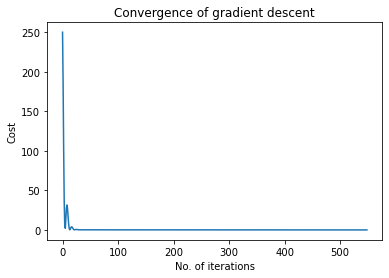

In [186]:
#Plot the cost function
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_output)

plt.show()

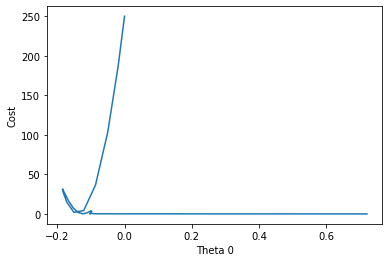

In [187]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 0')
plt.ylabel('Cost')
plt.plot(theta_output[:,0],cost_output)

plt.show()

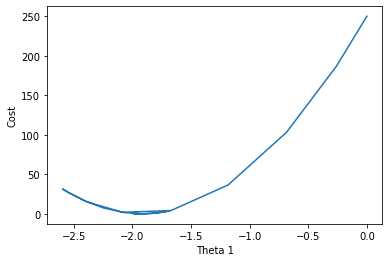

In [188]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 1')
plt.ylabel('Cost')
plt.plot(theta_output[:,1],cost_output)

plt.show()

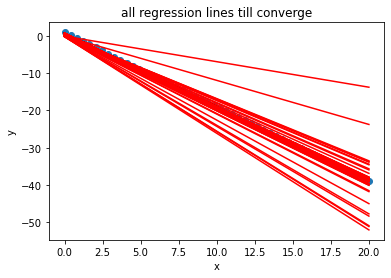

In [189]:
plt.scatter(X[:,1], y)
for i in range(1,len(predictions_output)):
    plt.plot(X[:,1], predictions_output[i], c='red')
plt.title('all regression lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

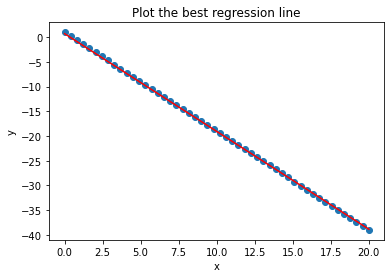

In [190]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_predicted, c='red')
plt.title('Plot the best regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Congratulations 
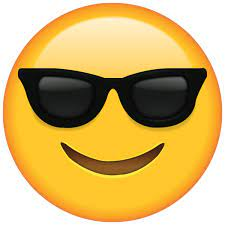